In [6]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
start=datetime(2014, 1, 1)
end=datetime(2017,1,1)
# Risk-Free rate = 1 Month Treasury Bill (converted to daily)
one_mon = web.DataReader('DGS1MO', 'fred',start, end)
one_day = np.log(1+one_mon)/365

[*********************100%***********************]  1 of 1 completed


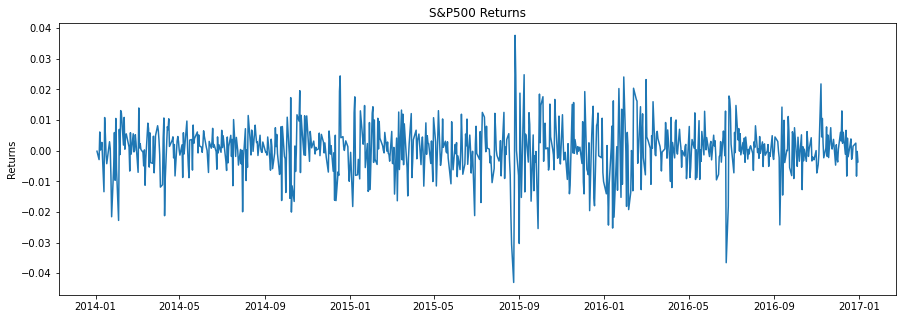

In [10]:
# S&P500 Returns
yf.pdr_override()
spy = pdr.get_data_yahoo("SPY", start, end)
spy_returns = pd.DataFrame(np.diff(np.log(spy['Adj Close'].values)))
spy_returns.index = spy.index.values[1:spy.index.values.shape[0]]
spy_returns.columns = ['S&P500 Returns']

plt.figure(figsize=(15,5));
plt.plot(spy_returns);
plt.ylabel('Returns');
plt.title('S&P500 Returns');
plt.show();

[*********************100%***********************]  1 of 1 completed


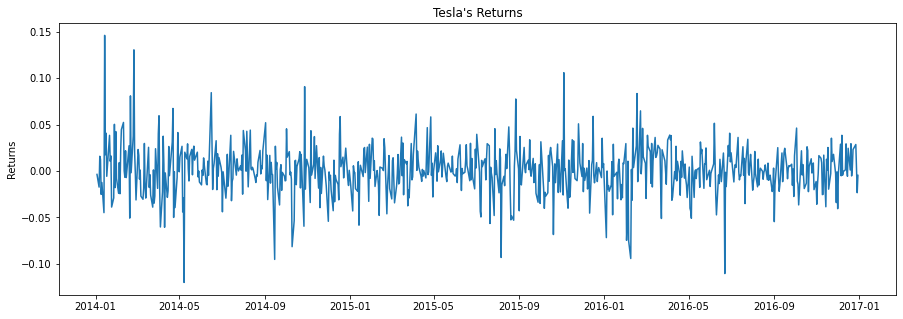

In [32]:
# Returns on Tesla Stock
t = pdr.get_data_yahoo('TSLA', start, end)
t_returns = pd.DataFrame(np.diff(np.log(t['Adj Close'].values)))
t_returns.index = t.index.values[1:t.index.values.shape[0]]
t_returns.columns = ["Tesla's Returns"]

plt.figure(figsize=(15,5));
plt.plot(m_returns);
plt.ylabel('Returns');
plt.title("Tesla's Returns");
plt.show();

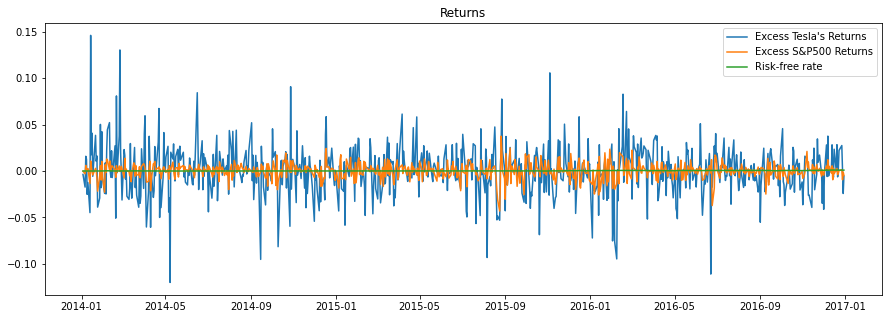

In [33]:
# Merge the series to ensure they are on the same timescale, then calculate excess returns
returns = pd.concat([one_day,t_returns,spy_returns],axis=1).dropna()
excess_t = returns["Tesla's Returns"].values - returns['DGS1MO'].values
excess_spy = returns["S&P500 Returns"].values - returns['DGS1MO'].values
final_returns = pd.DataFrame(np.transpose([excess_t,excess_spy, returns['DGS1MO'].values]))
final_returns.columns=["Excess Tesla's Returns","Excess S&P500 Returns","Risk-free rate"]
final_returns.index = returns.index

plt.figure(figsize=(15,5))
plt.title("Returns")
x = plt.plot(final_returns);
plt.legend(iter(x), final_returns.columns);

In [34]:
import statsmodels.api as sm

exog = excess_spy
exog = sm.add_constant(exog, prepend=True)
mod = sm.OLS(excess_t, exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           5.02e-35
Time:                        18:43:42   Log-Likelihood:                 1734.2
No. Observations:                 749   AIC:                            -3464.
Df Residuals:                     747   BIC:                            -3455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.884e-05      0.001      0.056      0.9

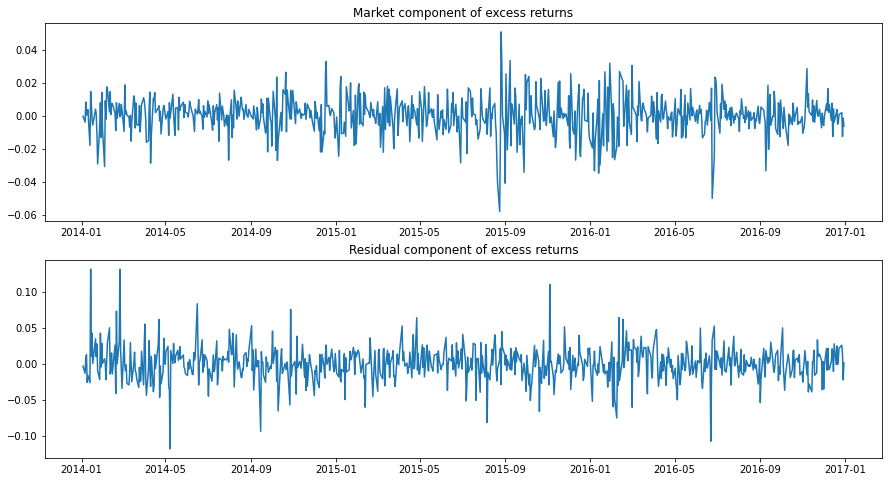

In [35]:
# Beta = 1.3515, Alpha = 0.00004

market_c = excess_spy*1.3515
residual_c = excess_t - market_c

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title("Market component of excess returns");
plt.plot(final_returns.index,market_c);
plt.subplot(212)
plt.title("Residual component of excess returns");
plt.plot(final_returns.index,residual_c);

In [36]:
# Ford Motor Company Returns
f = pdr.get_data_yahoo('F', start, end)
f_returns = pd.DataFrame(np.diff(np.log(f['Adj Close'].values)))
f_returns.index = f.index.values[1:f.index.values.shape[0]]
f_returns.columns = ["Ford's Returns"]

# General Motors Returns
g = pdr.get_data_yahoo('GM', start, end)
g_returns = pd.DataFrame(np.diff(np.log(g['Adj Close'].values)))
g_returns.index = g.index.values[1:g.index.values.shape[0]]
g_returns.columns = ["General Motors Returns"]

returns = pd.concat([one_day,f_returns,g_returns],axis=1).dropna()
excess_f = returns["Ford's Returns"].values - returns['DGS1MO'].values
excess_g = returns["General Motors Returns"].values - returns['DGS1MO'].values

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [39]:
# Gather Beta statistics 
mod = sm.OLS(excess_f, exog)
res = mod.fit()
print(res.summary())

mod = sm.OLS(excess_g, exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     554.4
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           3.99e-92
Time:                        18:48:33   Log-Likelihood:                 2312.1
No. Observations:                 749   AIC:                            -4620.
Df Residuals:                     747   BIC:                            -4611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.370      0.1

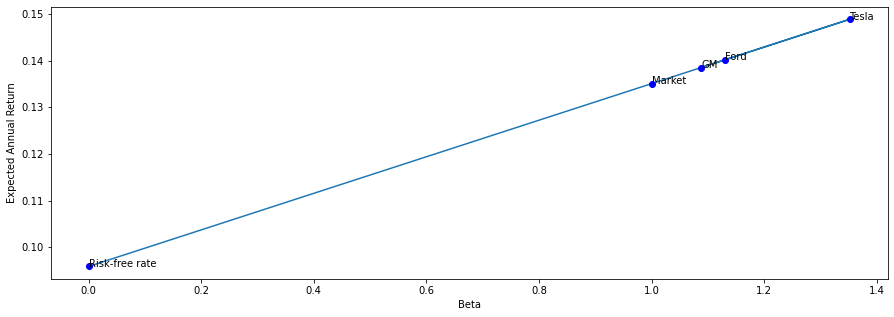

In [40]:
# Three Stock Security Market Line
expected_spy = np.log(1+np.mean(excess_spy))*365
betas = np.array([0,1,1.3515,1.1307,1.0879])
expected_rf = np.log(1+np.mean(returns['DGS1MO'].values))*365
expected_returns = betas*expected_spy + expected_rf
data_names = ['Risk-free rate', 'Market','Tesla','Ford','GM']

plt.figure(figsize=(15,5))
plt.plot(betas,expected_returns);
plt.plot(betas,expected_returns,'bo')

for i, txt in enumerate(expected_returns):
    plt.annotate(data_names[i], (betas[i],expected_returns[i]))

plt.xlabel("Beta");
plt.ylabel("Expected Annual Return");